In [1]:
# 

import pandas as pd
import re, requests
from bs4 import BeautifulSoup

import datetime
from dateutil.relativedelta import relativedelta

In [2]:
# setting plt

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
fm.findSystemFonts()
font = {"family":"IPAexGothic"}
mpl.rc('font', **font)

In [3]:
# nogizaka46

In [10]:
def get_month_list( start, end ):

    start_dt = datetime.datetime.strptime(start, "%Y%m")
    end_dt = datetime.datetime.strptime(end, "%Y%m")

    lst = []
    t = start_dt
    while t <= end_dt:
        lst.append(t)
        t += relativedelta(months=1)

    return [x.strftime("%Y%m") for x in lst]

def get_nogi_articles_from_single_page( page_soup ):
    
    titles = [ i.find('span', class_='entrytitle').text for i in page_soup.find_all('h1', class_='clearfix') ]
    authors = [ i.text for i in page_soup.find_all('span', class_='author') ]
    datetimes = [ i.text.split('｜')[0].replace(' ','').replace('\n','') for i in page_soup.find_all('div', class_='entrybottom') ]
    page_urls = [ i.find('a').get('href') for i in page_soup.find_all('div', class_='entrybottom') ]
    texts = []
    images = []
    for i, j in enumerate( page_soup.find_all('div', class_='entrybody') ): # 画像URL抽出 ... アドホックな処理多いので注意
        image_urls = []
        for img in j.find_all('img', src=re.compile("^http(s)?://img.nogizaka46.com/blog/")):
            if img.get('src')[-4:] == '.gif':continue
            if not img.get('class') == None:
                if img.get('class')[0] == 'image-embed':
                    continue
            image_urls.append( img.get('src') )
        image_str = ''
        for img in image_urls: image_str += '%s\t'% img
        texts.append( j.text )
        images.append( image_str )

    articles = []
    for i in range( len( titles ) ):
        articles.append( [authors[i], datetimes[i], titles[i], texts[i], images[i], page_urls[i]] )
    
    return articles

headers = {'User-Agent':'Mozilla/5.0'}

start = '201111'
end = '201901'
month_list = get_month_list( start, end )

all_articles = []
for date in month_list:
    print( date )
    target_url = 'http://blog.nogizaka46.com/?p=0&d=%s' % (date)
    r = requests.get(target_url, headers=headers)
    soup = BeautifulSoup(r.text, 'lxml')
    max_page_number = int( soup.find('div', class_='paginate').find_all('a')[-2].text.replace(u"\xa0",u"") ) # これでいいのか?
    for page_idx in range( 1, max_page_number+1, 1 ):
        target_url = 'http://blog.nogizaka46.com/?p=%d&d=%s' % (page_idx, date)
        r = requests.get(target_url, headers=headers)
        soup = BeautifulSoup(r.text, 'lxml')
        page_articles = get_nogi_articles_from_single_page( soup )
        all_articles.extend( page_articles )

201111
201112
201201
201202
201203
201204
201205
201206
201207
201208
201209
201210
201211
201212
201301
201302
201303
201304
201305
201306
201307
201308
201309
201310
201311
201312
201401
201402
201403
201404
201405
201406
201407
201408
201409
201410
201411
201412
201501
201502
201503
201504
201505
201506
201507
201508
201509
201510
201511
201512
201601
201602
201603
201604
201605
201606
201607
201608
201609
201610
201611
201612
201701
201702
201703
201704
201705
201706
201707
201708
201709
201710
201711
201712
201801
201802
201803
201804
201805
201806
201807
201808
201809
201810
201811
201812
201901


In [11]:
# check

import pandas as pd

df = pd.DataFrame( all_articles, columns=['author', 'datetime', 'title', 'text', 'images', 'url'] )
print( df.shape )
display( df.head() )
display( df.tail() )

(13028, 6)


,author,datetime,title,text,images,url
0,中田花奈,2011/11/3023:42,コンベンション2011わずんぬ。,来てくださったかたニコ生見てくださったかたありがとうございます！ 「部活何やってたの？」って...,https://img.nogizaka46.com/blog/photos/uncateg...,http://blog.nogizaka46.com/kana.nakada/2011/11...
1,松村沙友理,2011/11/3014:27,緊張なのだっ♪(o> <o),こんにちりんごっ♪(ｏ・・ｏ)さゆりんごっ(o・・o)\nいきなり質問に答えます!!よろしく...,,http://blog.nogizaka46.com/sayuri.matsumura/20...
2,星野みなみ,2011/11/3011:50,やっと会えますねー(* ´д｀*)みなみ,\n \n \n今日はZepp東京でイベントです\n \nもーどーしよー(・・;)\n \...,,http://blog.nogizaka46.com/minami.hoshino/2011...
3,衛藤美彩,2011/11/3010:00,衛藤『ななみん、寒くないん(>_<)?』深川『大丈夫だよ道産子だから!!』,おはよう〜(*^^*)みさみさです！ \n題名は若月blogを意識してみました。。。。...,https://img.nogizaka46.com/blog/photos/uncateg...,http://blog.nogizaka46.com/misa.eto/2011/11/00...
4,井上小百合,2011/11/3009:05,ヽ(｡･ω･｡)蒼い銀河,更新、遅くなってしまってごめんなさいm(__)m名古屋から帰ってきて次の日も収録、撮影、イン...,https://img.nogizaka46.com/blog/photos/uncateg...,http://blog.nogizaka46.com/sayuri.inoue/2011/1...


,author,datetime,title,text,images,url
13023,桜井玲香,2019/01/0215:36,2019.01.02,明けまして おめでとうございます！ 今年もどうぞよろしくお願いします！ 今年...,https://img.nogizaka46.com/blog/reika.sakurai/...,http://blog.nogizaka46.com/reika.sakurai/2019/...
13024,阪口珠美,2019/01/0211:00,2019年坂道のぼるぞー,さかぐち 坂道 登り坂！たまにはたまみと登ってね。 あけましておめでとうございます！！！...,https://img.nogizaka46.com/blog/tamami.sakaguc...,http://blog.nogizaka46.com/tamami.sakaguchi/20...
13025,堀未央奈,2019/01/0121:18,2019,新年あけましておめでとうございます☺︎ みなさんはどんなお正月をお過ごしですか...,https://img.nogizaka46.com/blog/miona.hori/img...,http://blog.nogizaka46.com/miona.hori/2019/01/...
13026,佐藤楓,2019/01/0120:36,新年、あけましておめでとうございます。明日明後日は何があっても箱根駅伝を見ましょう！ 127.,明けましておめでとうございます！！ 佐藤楓です 新年早々ブログ失礼しますm(_ _)m...,https://img.nogizaka46.com/blog/kaede.satou/im...,http://blog.nogizaka46.com/kaede.satou/2019/01...
13027,伊藤かりん,2019/01/0111:06,第421話 今年の主役はプンバァ！,あけましておめでとうございます！ 紅白ご覧いただきありがと...,https://img.nogizaka46.com/blog/karin.itou/img...,http://blog.nogizaka46.com/karin.itou/2019/01/...


In [12]:
# save csv

df.to_csv( '../../data/nogizaka46_blog.csv', index=0 )

In [13]:
# read csv

df = pd.read_csv( '../../data/nogizaka46_blog.csv' )

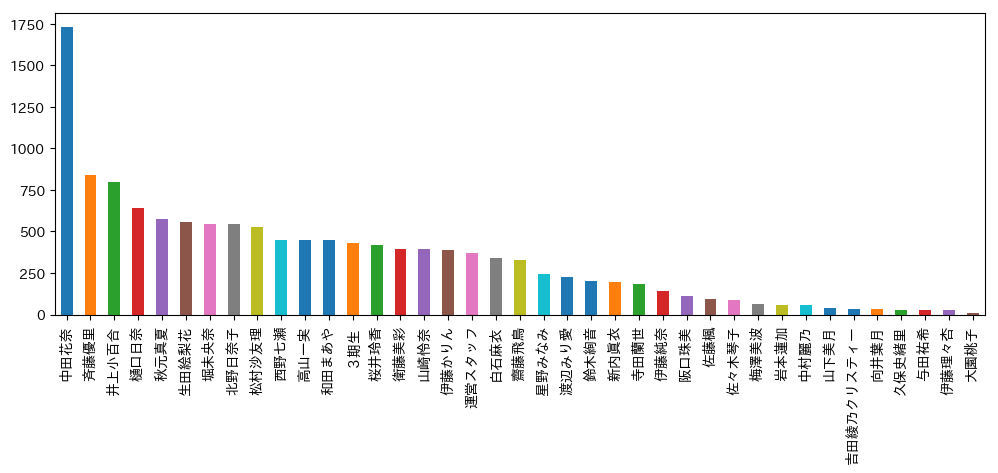

In [14]:
# plot article numbers each author

fig = plt.figure(figsize=(12,4),dpi=100)
df['author'].value_counts().plot(kind='bar')
plt.show()

In [113]:
# keyakizaka46

In [10]:
def get_keyaki_articles_from_single_page( page_soup ):

    articles = []
    for i, j in enumerate( page_soup.select('article') ):
        author = j.p.text.replace(' ','').replace('\n','')
        datetime = j.find('div', class_="box-bottom").li.text.replace(' ','').replace('\n','')
        title = j.find('div', class_="box-ttl").a.text
        body = j.find('div', class_="box-article")
        text = body.text
        page_url = 'http://www.keyakizaka46.com' + j.find('li', class_="singlePage").a.get('href')
        images = ''
        for img in  body.find_all('img'): images += '%s\t'% img.get('src')
        articles.append( [author, datetime, title, text, images, page_url] )    
    return articles

max_page_number = 819

all_articles = []
for page_idx in range( max_page_number, -1, -1 ):
    if page_idx % 100 == 0: print(page_idx)
    target_url = 'http://www.keyakizaka46.com/s/k46o/diary/member/list?ima=0000&page=%d&cd=member' % page_idx
    r = requests.get(target_url)
    soup = BeautifulSoup(r.text, 'lxml')
    page_articles = get_keyaki_articles_from_single_page( soup )
    all_articles.extend( page_articles )

800
700
600
500
400
300
200
100
0


In [12]:
# check

df = pd.DataFrame( all_articles, columns=['author', 'datetime', 'title', 'text', 'images', 'url'] )
print( df.shape )
display( df.head() )
display( df.tail() )

(16367, 6)


,author,datetime,title,text,images,url
0,石森虹花,2015/11/1323:43,ん〜〜。。。寝れない(つД`)ノ,\n\n\nみんなさんこんばんわ!\n\n欅坂46 石森虹花です U・x・Uワン!\n\n\...,http://cdn.keyakizaka46.com/images/14/c47/4b13...,http://www.keyakizaka46.com/s/k46o/diary/detai...
1,土生瑞穂,2015/11/1323:42,どきどきぶろぐ,\n皆さんはじめまして!欅坂46の土生瑞穂 です。いよいよ 明日・明後日お見立て会が開催され...,http://cdn.keyakizaka46.com/files/14/diary/k46...,http://www.keyakizaka46.com/s/k46o/diary/detai...
2,佐藤詩織,2015/11/1322:24,皆様初めまして,\nみなさま はじめまして!こんばんは!欅坂46の佐藤詩織です!*夜遅くに ありがとうござい...,http://cdn.keyakizaka46.com/files/14/diary/k46...,http://www.keyakizaka46.com/s/k46o/diary/detai...
3,原田葵,2015/11/1322:22,初めて⍤⃝♡,\nみなさん、はじめまして( *ˊᵕˋ)ﾉ原田 葵ですこのブログを通して私のことをもっと知っ...,http://cdn.keyakizaka46.com/files/14/diary/k46...,http://www.keyakizaka46.com/s/k46o/diary/detai...
4,織田奈那,2015/11/1322:21,ドキドキ,\n皆さんこんちには今日からブログがスタートします♡とうとう明日はお見立て会です皆さんに会え...,http://cdn.keyakizaka46.com/files/14/diary/k46...,http://www.keyakizaka46.com/s/k46o/diary/detai...


,author,datetime,title,text,images,url
16362,東村芽依,2019/01/1823:36,㊗️,\n\nこんばんは!東村芽依です🌱みほに写真集をもらいました✨\nいぇーい⸜⌄̈⃝⸝‍ちゃん...,http://cdn.keyakizaka46.com/files/14/diary/k46...,http://www.keyakizaka46.com/s/k46o/diary/detai...
16363,加藤史帆,2019/01/1823:35,皆さん来て下さい宜しくお願いします(・ω・)🌟,\nこんにちは!けやき坂46の加藤史帆です!ムッ😐からのニターーーーー😆って感じの写真!いよ...,http://cdn.keyakizaka46.com/files/14/diary/k46...,http://www.keyakizaka46.com/s/k46o/diary/detai...
16364,加藤史帆,2019/01/1823:34,ぽっかぽかになります(・ω・)☀️,\n\n\nこんばんは!\n\n\nけやき坂46の加藤史帆です!\n\n\n\n\n\n\n...,http://cdn.keyakizaka46.com/images/14/b2c/dffe...,http://www.keyakizaka46.com/s/k46o/diary/detai...
16365,井口眞緒,2019/01/1823:33,『スナック眞緒』〜第7夜〜,\n\n\n\n\n『スナック眞緒』第7夜のお客様は\n渡邉美穂ちゃんでした〜\n\nご来店...,http://cdn.keyakizaka46.com/images/14/d3f/0ba2...,http://www.keyakizaka46.com/s/k46o/diary/detai...
16366,井口眞緒,2019/01/1823:32,『スナック眞緒』〜第6夜〜,\n\n\n\n\n【納豆からの卒業】\n\n\n\n『スナック眞緒』第6夜のお客様は\nけ...,http://cdn.keyakizaka46.com/images/14/f37/0f44...,http://www.keyakizaka46.com/s/k46o/diary/detai...


In [13]:
# save csv

df.to_csv( '../../data/keyakizaka46_blog.csv', index=0 )

In [14]:
# read csv

df = pd.read_csv( '../../data/keyakizaka46_blog.csv' )

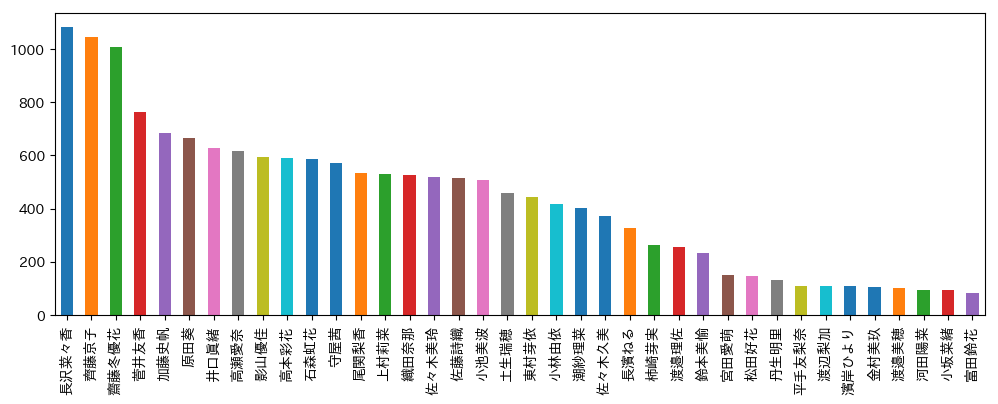

In [15]:
# plot article numbers each author

fig = plt.figure(figsize=(12,4),dpi=100)
df['author'].value_counts().plot(kind='bar')
plt.show()